In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
df_data_21 = pd.read_csv('world-happiness-report-2021.csv')
df_data_21
df_data_past = pd.read_csv('world-happiness-report.csv')
df_data_past
## List of Hong Kong's neightbor countries/provinces (East Asia)
east_asia = df_data_21[df_data_21['Regional indicator'] == "East Asia"]['Country name'].to_list()
## Dataset of Hong Kong's neightbor countries/provinces (East Asia)
df_east_asia = pd.DataFrame(df_data_21[df_data_21['Country name'].isin(east_asia)])
# The country in the world that has the highest ladder score: Finland
data_21_top = df_data_21.iloc[0:1]
# The country in the world that has the lowest ladder score: Afghanistan 
data_21_bottom = (df_data_21.iloc[-1])
# The country (province) in East Asia that has the highest ladder score: Taiwan 
east_asia_top = df_east_asia.iloc[0:1]
# The country (province) in East Asia that has the lowest ladder score: China
east_asia_bottom = (df_east_asia.iloc[-1])
# Hong Kong
east_asia_HK = (df_east_asia.iloc[-2])
# Means 
data_21_mean_score = float(round(df_data_21['Ladder score'].mean(),2))
east_asia_mean_score = float(round(df_east_asia['Ladder score'].mean(),2))

e_a_meanVStop = abs(east_asia_mean_score - float(round(east_asia_top['Ladder score'].mean(),2)))
e_a_meanVSbottom = abs(east_asia_mean_score - float(round(east_asia_bottom['Ladder score'].mean(),2)))
e_a_meanVSHK = abs(east_asia_mean_score - float(round(east_asia_HK['Ladder score'].mean(),2)))

data_21_meanVStop = abs(data_21_mean_score - float(round(data_21_top['Ladder score'].mean(),2)))
data_21_meanVSbottom = abs(data_21_mean_score - float(round(data_21_bottom['Ladder score'].mean(),2)))



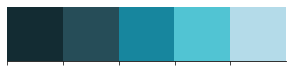

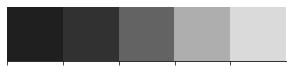

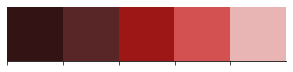

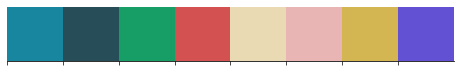

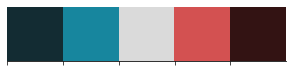

In [6]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']

sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb =mpl.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

th = [0, 0.2, 0.5, 0.8, 1]
cdict = NonLinCdict(th, colors_blue )
cdiv = NonLinCdict(th, colors_div)

cm = LinearSegmentedColormap('blue', cdict)
cm_div = LinearSegmentedColormap('div',cdiv)

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.titlecolor'] = colors_dark[0]
mpl.rcParams['axes.labelcolor'] = colors_dark[0]

# tick
mpl.rcParams['xtick.color'] = colors_dark[0]
mpl.rcParams['ytick.color'] = colors_dark[0]
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12


# legend 
mpl.rcParams['legend.edgecolor'] = "#1F1F1F"

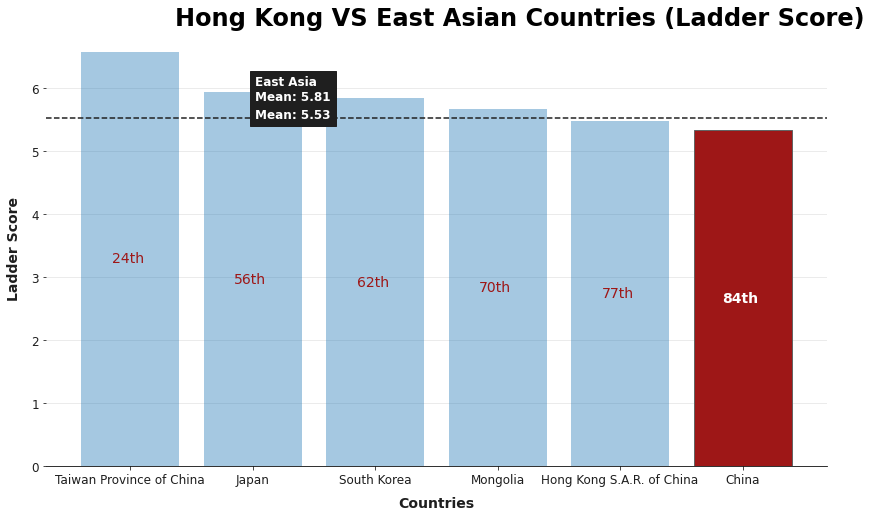

In [18]:
# Pick the index we need for East Asia countries -- +1 because original index starts from 0
east_asia_idx = list(df_east_asia.index + 1)
 
# Graph setup -- mathplotlib
fig, ax = plt.subplots(figsize=(14, 8)) # Create a frame of the graphs

ax.grid(axis='y', alpha=0.3) # Create grid 
ax.set_axisbelow(True)

ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold')
ax.set_ylabel("Ladder Score", fontsize=14, labelpad=10, fontweight='bold')

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()


# Line for Global Mean 
data_21_mean_line = ax.text(
                                s="Global\nMean: {:.2f}".format(data_21_mean_score),
                                x=xmax*1.02,
                                y=data_21_mean_score,
                                backgroundcolor= '#1F1F1F',
                                fontsize=12,
                                fontweight='bold',
                                color='white'
)

# Line for Mean - East Asian Countries 
east_asian_mean_line = ax.text(
                                s="East Asia\nMean: {:.2f}".format(east_asia_mean_score),
                                x=xmax*1.02,
                                y=east_asia_mean_score,
                                backgroundcolor= '#1F1F1F',
                                fontsize=12,
                                fontweight='bold',
                                color='white'
)



# East Asian Countries Ladder Score Bar
bars1 = ax.bar(df_east_asia['Country name'], df_east_asia['Ladder score'], alpha=0.4)

line  = ax.axhline(data_21_mean_score, linestyle='--', color="#1F1F1F")

# HK Ladder Score Bar
bars1[5].set_alpha(1)
bars1[5].set_color('#9E1717')
bars1[5].set_edgecolor('#636363')

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i != 5 : 
        ax.text(
            s=f"{east_asia_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color= '#9E1717',
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{east_asia_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
    
plt.text(s="Hong Kong VS East Asian Countries (Ladder Score)", ha='right', x='Center', y=ymax*7, fontsize=24, fontweight='bold')
#plt.tight_layout()
plt.show()


In [9]:

xmin, xmax

(-0.69, 5.6899999999999995)

In [ ]:
df_e_a_data_past = df_data_past[df_data_past['Country name'].isin(east_asia)].set_index('Country name')
df_hk = df_e_a_data_past.loc['Hong Kong S.A.R. of China'].reset_index()
df_e_a_nonHK = df_e_a_data_past[df_e_a_data_past['Country name'] != "Hong Kong S.A.R. of China"]
mean_hk = df_hk['Life Ladder'].mean()

fig, ax = plt.subplots(figsize=(14, 8), dpi=75)

line0 = sns.lineplot(data=df, x='year', y='Life Ladder', hue='Country name', alpha=0.2, ax=ax, palette=colors_mix[:9])
line1 = ax.plot(df_idn.year, df_idn['Life Ladder'], alpha=1, marker='o', color=colors_red[3], linewidth=3, label='Indonesia')
line2 = ax.axhline(mean_idn, linestyle='--', alpha=1, color=colors_dark[1])


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Hong Kong's\nAverage\nScore: {:.2f}".format(mean_hk),
    x=xmax+0.5,
    y=mean_hk,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)

plt.text(s="Indonesia's Ladder Score Since 2006", ha='left', x=xmin, y=ymax*1.08, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.show()